# Heart Disease Project
## Exploratory analysis
### Prediction of heart disease given 14 variables

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-info">
<b>Import data</b>
</div>

In [2]:
# Import data
df = pd.read_csv('../data/raw/processed.cleveland.data', header = None, names = ['age', 'sex', 'cp', 'trestbps', 'col',
                'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], index_col=None,
                 usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], sep=',', skipinitialspace=True)
df.head(20)
print(df.shape)

,age,sex,cp,trestbps,col,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


(303, 14)


The dataset read from csv file has 303 rows and 14 columns.
The data dictionary specified 303 rows and 75 columns.
We therefore have the same number of rows but 61 fewer columns.

Let us see why this is the case... The following was found in the data directory:

"The file cleveland.data has been unfortunately messed up when we lost node cip2 and loaded the file on node ics.
The file processed.cleveland.data seems to be in good shape and is usable (for the 14 attributes situation).
I'll clean up cleveland.data as soon as possible...
Bad news: my original copy of the database appears to be corrupted. I'll have to go back to the donor to get a new copy."

Seems like we will have to settle on 14 columns at first! Time permitting we will revisit the remaining 61 variables
and see if we can make anything out of the corrupted data.

Let us explore the data!

<div class="alert alert-block alert-info">
<b>Explore data</b>
</div>

In [3]:
# Type of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   col       303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


We have twelve numeric variables and two categorical variable. This could be a problem, as the data dictionary
specifies all the fields are numeric. Let us investigate.

In [4]:
# TODO: Write code to isolate '?' in data for visual analysis.
#df['ca'].str.isdecimal()

# Replace all non numeric data with NaN, convert strings to numbers.
df = df.apply(pd.to_numeric, errors='coerce')

We now converted all character values to decimal and non-numeric strings to NaNs, next we check for null values.

In [5]:
# Null values
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
col         0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


We have 6 null values. Let's see which records contain null values.

In [6]:
# Null values
df[df.isnull().any(axis=1)]


,age,sex,cp,trestbps,col,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


As expected the null values are found in the 'ca' and 'thal' fields. Luckily none of the other fields contain any null
values. Seeing as none of these values is in the response variable, we don't need to remove these records from the
dataset.

We now have a dataset with 303 records and 14 numeric fields, as per the data dictionary, there are still 6 missing
values in the 'ca' and 'thal' fields though. We will substitute these with median values.

In [7]:
df_fin = df.copy()
median = df_fin['ca'].median()
df_fin['ca'].fillna(median, inplace=True)
print("Number of null values in ca column: {}".format(df_fin['ca'].isnull().sum()))

median = df_fin['thal'].median()
df_fin['thal'].fillna(median, inplace=True)
print("Number of null values in thal column: {}".format(df_fin['thal'].isnull().sum()))
print("Dataframe dimension: {}".format(df_fin.shape))

Number of null values in ca column: 0
Number of null values in thal column: 0
Dataframe dimension: (303, 14)


Now our set is ready for further analysis. We will now look at the distribution of variables and any possible outliers
or heavy tailed distributions.

In [8]:
print(df_fin.nunique())

age          41
sex           2
cp            4
trestbps     50
col         152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64


There are no columns with only one value. We therefore retain all columns. Interesting to observe that there is also a
fair amount of similarity in in the cholesterol measurements which is surprising. There are many variables with fewer
than 10 levels and hence the following variables should be considered as categorical:

- sex (nominal)
- cp (ordinal)
- fbs (ordinal)
- restecg (ordinal)
- exang (ordinal)
- slope (ordinal)
- ca (ordinal)
- thal (ordinal)
- num (binary)

It will make sense to one-hot-encode the sex variable. We will do this later. The other features we will retain as
numeric/ ordinal for the moment.
Next we look at the distribution of the data.
We start by splitting the response and the features.

In [9]:
# Split data into features (X) and response (y)
# Predict mpg vs other variables (excluding car name)
X = df_fin.loc[:, ('age', 'sex', 'cp', 'trestbps', 'col', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                   'ca', 'thal')]
# Group response values to form binary response
df_fin['num'] = df_fin['num'].apply(lambda x: 1 if x > 0 else 0)
y = df_fin.loc[:, 'num']

Let us look at the response first.

count    303.000000
mean       0.458746
std        0.499120
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: num, dtype: float64

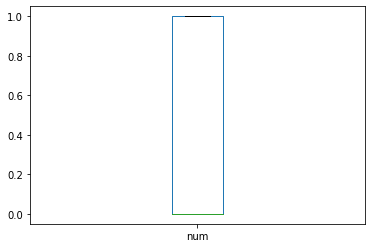

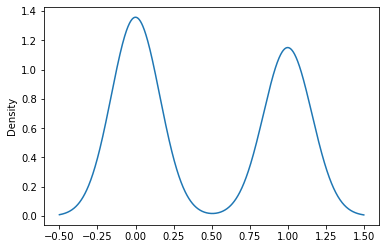

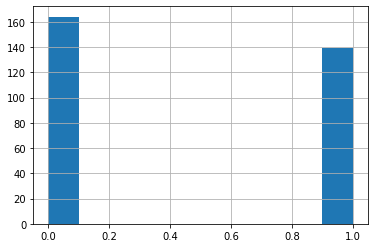

Skewness value: 0.16640599744346862


In [10]:
y.describe()
_ = y.plot(kind='box', subplots=False);
plt.show();
#y.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
_ = y.plot(kind='density', subplots=False);
plt.show();
_ = y.hist();
plt.show();
skew = y.skew()
print("Skewness value: {}".format(skew))

All looks good here. No obvious issues with the data. The one outlier at 46 is hard to believe for a car
made in the mid - eighties, but who knows, maybe it was an early hybrid prototype. Else the spread is what is expected.
The data is slightly skewed, but still approximately symmetric. No need for any normalisation (for regression purposes).

Let us look at the all the variables together. The distributions of all the datasets look fairly normal.

In [11]:
df_fin.describe()

,age,sex,cp,trestbps,col,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


As can be seen the distributions of all the datasets look fairly normal. Let us now look at these visually.

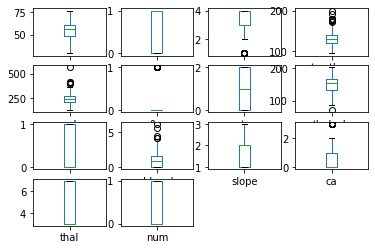

In [12]:
df_fin_num = df_fin.copy()
names = ['age', 'sex', 'cp', 'trestbps', 'col', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
         'num']
df_fin_num.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show();

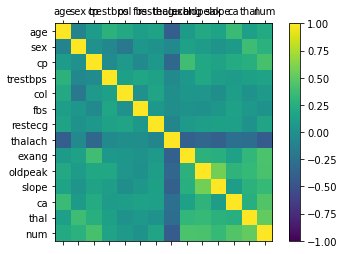

In [13]:
correlations = df_fin_num.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show();

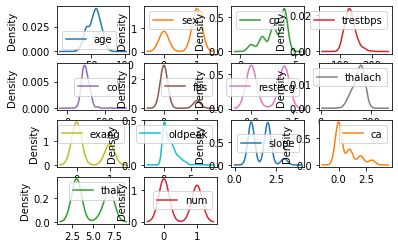

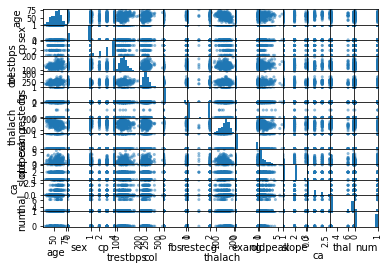

In [14]:
df_fin_num.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
pd.plotting.scatter_matrix(df_fin_num)
#sns.pairplot(df_fin_num, vars=names, hue="mpg", plot_kws = {'alpha': 0.3, 's': 40, 'edgecolor': 'k'}, palette=sns.color_palette(), size = 9)
plt.show();


No surprises here with regards to the feature variables. It should be noted that there are quite a number of outliers
for the horsepower and acceleration variables. It does make sense however that cars with high horsepower will also
have high acceleration, so there is correlation here in all likelihood.
The correlation plot shows that mpg is strongly inversely correlated to No. of cylinders, displacement, horsepower and
weight. Again this makes sense as cars with more powerful engines will typically have lower mpg (more fuel consumption).
Likewise there is a small positive correlation between mpg and acceleration, model_year and origin. This implies that
faster and newer cars have higher fuel consumption.
The distributions of the feature variables have varying scales, so standardisation would be required for ML purposes.

<div class="alert alert-block alert-info">
<b>Build Model</b>
</div>

We can now start building our model.
We begin with a simple Multi Layer Perceptron using scikit-learn to better understand the data.

In [15]:
# Put the response y into an array
y = np.ravel(y)

We start by One Hot Encoding the sex variable we found to have insufficient levels
for a continuous (interval) variable.

In [16]:
# One hot encoding TODO - drop first needs to be implemented
df_fin_nn = df_fin_num.loc[:, ('age', 'cp', 'trestbps', 'col', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
                               'slope', 'ca', 'thal')]
ohe = OneHotEncoder(categories='auto')
x_sex = ohe.fit_transform(df_fin.sex.values.reshape(-1, 1)).toarray()
x_sex_ohe = pd.DataFrame(x_sex, columns = ["sex_"+str(int(i)) for i in range(x_sex.shape[1])])

In [17]:
# Add encoded feature to the dataframe
df_fin_nn.reset_index(drop=True, inplace=True)
x_sex_ohe.reset_index(drop=True, inplace=True)
df_fin_nn = pd.concat([df_fin_nn, x_sex_ohe], axis=1)

X = df_fin_nn.copy()
X.head()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

,age,cp,trestbps,col,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_0,sex_1
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,1.0
1,67.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0.0,1.0
2,67.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0.0,1.0
3,37.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,1.0
4,41.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,1.0,0.0


In [18]:
# Scale data
scaler = StandardScaler()

# Fit on training data set
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Apply to test data
X_test = scaler.transform(X_test)

StandardScaler()

### MSE before model optimisation

In [19]:
# Fit and check MSE before regularisation
reg = MLPClassifier(max_iter=50000, solver="adam", activation="tanh", hidden_layer_sizes=(5, 5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 5), max_iter=50000,
              random_state=1)

0.8157894736842105

We now optimise the NN architecture.

In [20]:
# Optimise numbers of nodes on both layers
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,6) for j in range(3,6)]:

    reg = MLPClassifier(max_iter=1000000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(3, 3) : 0.80612
(3, 4) : 0.78000
(3, 5) : 0.79739
(4, 3) : 0.77077
(4, 4) : 0.76215
(4, 5) : 0.77965
(5, 3) : 0.81059
(5, 4) : 0.74891
(5, 5) : 0.79739


In [21]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))
optimal_hidden_layer_size = [name for name, score in validation_scores.items()
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )


The highest validation score is: 0.8106
This corresponds to nodes (5, 3)


Now we optimise neural network regularisation parameter

 alpha  |  Accuracy
0.04979 |  0.845792578792113
0.13534 |  0.8414066138798323
0.36788 |  0.8370206489675516
1.00000 |  0.8325958702064897
2.71828 |  0.8370206489675516
7.38906 |  0.8370206489675516
20.08554 |  0.8546033224654557
54.59815 |  0.45373389225275573
148.41316 |  0.45373389225275573


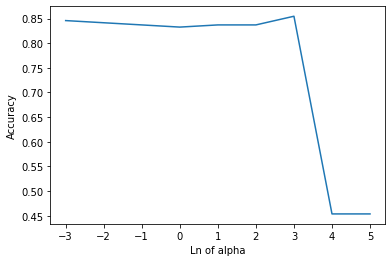

In [22]:
# Select range over which to find regularisation parameter - exponential used for even distribution of values
reg_par = [np.e**n for n in np.arange(-3,6,1)]

validation_scores = {}
print(" alpha  |  Accuracy")
for param in reg_par:
    reg = MLPClassifier(max_iter=1000000, solver="adam", activation="tanh", hidden_layer_sizes=optimal_hidden_layer_size, alpha=param,
                        random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2, scoring="accuracy")
    validation_scores[param] = score.mean()
    print("%0.5f |  %s" % (param, score.mean()))

# Plot the accuracy function against regularisation parameter
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()));
plt.xlabel("Ln of alpha");
plt.ylabel("Accuracy");

The highest cross-validation accuracy score and hence the value to use for the `alpha` parameter is as follows.

In [23]:
max_score = ([np.log(name) for name, score in validation_scores.items() if score==max(validation_scores.values())][0])
# Find lowest value.
print("The highest accuracy score is: %s" % (max(validation_scores.values())))
print("This corresponds to regularisation parameter e**%s" % max_score)

The highest accuracy score is: 0.8546033224654557
This corresponds to regularisation parameter e**3.0


### MSE after regularisation

In [24]:
# Fit data with the best parameter
reg = MLPClassifier(max_iter=1000000, solver="adam", activation="tanh", hidden_layer_sizes=optimal_hidden_layer_size,
                    alpha=np.e**(max_score), random_state=1)

reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Accuracy after model parameter optimisation
accuracy_score(y_pred,y_test)

MLPClassifier(activation='tanh', alpha=20.085536923187664,
              hidden_layer_sizes=(5, 3), max_iter=1000000, random_state=1)

0.47368421052631576

### Plot response curves

In [25]:
# Create X_design_vec, which contains the median of each respective column
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.median()).transpose()
X_design_vec.head()

,age,cp,trestbps,col,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_0,sex_1
0,56.0,3.0,130.0,241.0,0.0,1.0,153.0,0.0,0.8,2.0,0.0,3.0,0.0,1.0


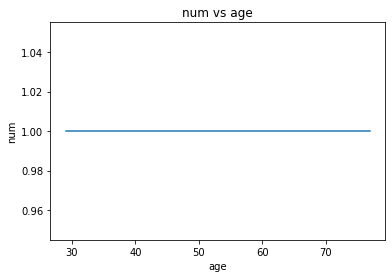

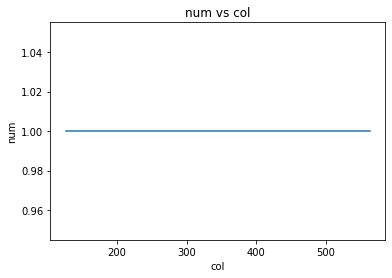

In [26]:
# Set up a sequence for response variable to plot
min_res = min(X.loc[:,"age"])
max_res = max(X.loc[:,"age"])
seq = np.linspace(start=min_res,stop=max_res,num=50)

# Set up a list of moving resultants to plot
to_predict = []
for result in seq:
    X_design_vec.loc[0,"age"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot
plt.plot(seq,predictions)
plt.xlabel("age")
plt.ylabel("num")
plt.title("num vs age")
plt.show();

# Plot second curve

# Set up a sequence to plot
min_res = min(X.loc[:,"col"])
max_res = max(X.loc[:,"col"])
seq = np.linspace(start=min_res,stop=max_res,num=50)

# Set up a list of moving resultants to plot
to_predict = []
for result in seq:
    X_design_vec.loc[0,"col"] = result
    to_predict.append(X_design_vec.copy())

# Convert back to dataframe
to_predict = pd.concat(to_predict)

# Scale and predict
to_predict = scaler.transform(to_predict)
predictions = reg.predict(to_predict)

# Plot
plt.plot(seq,predictions)
plt.xlabel("col")
plt.ylabel("num")
plt.title("num vs col")
plt.show();

Our model captures the inverse proportional relationship between both response variables weight and displacement
plotted against mpg. This is a positive outcome, as it means the model as applied to the validation dataset managed to
capture these signals in the data. We can therefore conclude that the model generalises well and that variance is
sufficiently low for this model to capture salient features in the underlying data.